In [44]:
import numpy as np
import pandas as pd
from Bio import SeqUtils
from Bio import SeqIO

Looking at stats

In [3]:
dfp['Len'] = [len(s) for s in dfp['Seq'].to_list()]
dfn['Len'] = [len(s) for s in dfn['Seq'].to_list()]

dfp = dfp.sort_values('Len').reset_index(drop = True)
dfn = dfn.sort_values('Len').reset_index(drop = True)

dfp['GC'] = [SeqUtils.GC(dfp.loc[i,'Seq']) for i in range(len(dfp))]
dfn['GC'] = [SeqUtils.GC(dfn.loc[i,'Seq']) for i in range(len(dfn))]

<ipython-input-3-f6b3f534691f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Len'] = [len(s) for s in dfp['Seq'].to_list()]
<ipython-input-3-f6b3f534691f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['Len'] = [len(s) for s in dfn['Seq'].to_list()]


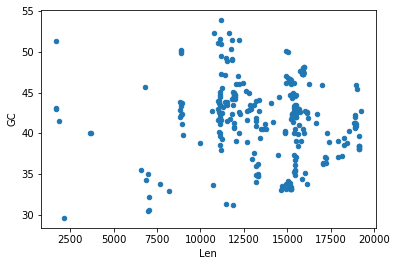

In [38]:
dfn.plot(x = 'Len', y = 'GC', kind='scatter')

In [43]:
dfp.loc[dfp['GC'] > 65 ] 

,Id,Org,MolTyp,Topol,Des,Gen,Seq,Len,GC
1573,NC_003347.1,Grapevine fleck virus,RNA,linear,"Grapevine fleck virus, complete genome",ssRNA(+),GCACATTAGTACTGACCACCAGCCCGACTTTGACGCCACCCTGTCC...,7564,66.234796
2115,MH745077.1,Rubella virus genotype 2B,RNA,linear,Rubella virus genotype 2B strain RVi/Pune.IND/...,ssRNA(+),CAATGGGAGCTACCGGACCTCGCTTAGGACTCCTATTCCCATGGAG...,9761,69.664993
2116,NC_001545.2,Rubella virus,ss-RNA,linear,"Rubella virus, complete genome",ssRNA(+),CAATGGAAGCTATCGGACCTCGCTTAGGACTCCCATTCCCATGGAG...,9762,69.596394
2117,MK780807.1,Rubella virus genotype 1A,RNA,linear,Rubella virus genotype 1A strain RVs/Oulu.FIN/...,ssRNA(+),CAATGGGAGCTATCGGACCTCGCTTAGGACTCCTATTCCCATGGAG...,9762,67.885679


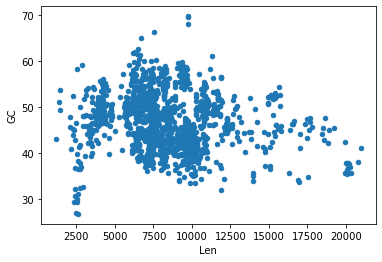

In [42]:
dfp.loc[dfp['Len'] < 25000].plot(x = 'Len', y = 'GC', kind='scatter')

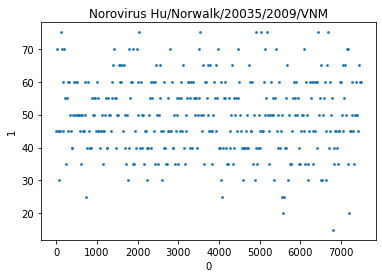

KeyboardInterrupt: 

In [97]:
#looking at distribution of gc contenct in a genome

def gc_plotter(seq, winsize):
    qgc = []
    for i in range(0, len(seq) - winsize + 1, winsize):
        query = seq[i: i + winsize]
        gc = SeqUtils.GC(query)
        qgc.append([i, gc])
        
    return qgc

import time
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

for i,r in dfp.loc[dfp['Len'] > 5000].iterrows():
    pd.DataFrame(gc_plotter(r['Seq'],20)).plot(x = 0, y = 1, kind='scatter', s = 3)
    plt.title(r['Org'])
    plt.show()
    time.sleep(3)
    clear_output(wait=True)

In [ ]:
looking at transition matrices

In [31]:
lp = dfp.loc[350, 'Seq']
sp = dfp.loc[3867, 'Seq']
ln = dfn.loc[3127, 'Seq']
sn = dfn.loc[2853, 'Seq']

In [34]:
tlp = transition_matrix(lp)
tsp = transition_matrix(sp)
tln = transition_matrix(ln)
tsn = transition_matrix(sn)

In [40]:
print(tlp, '\n\n', tsp, '\n\n', tln, '\n\n', tsn)

[[0.36805428 0.36768751 0.11290421 0.15135399]
 [0.37258244 0.32278622 0.20414969 0.10048166]
 [0.41290538 0.30508191 0.13306586 0.14894684]
 [0.53173563 0.24321288 0.10934282 0.11570867]] 

 [[0.29180328 0.27213115 0.20655738 0.2295082 ]
 [0.24184783 0.29619565 0.20108696 0.26086957]
 [0.22821577 0.3526971  0.22406639 0.19502075]
 [0.26865672 0.34328358 0.18656716 0.20149254]] 

 [[0.27566441 0.28243877 0.23866597 0.20323085]
 [0.25234002 0.26399236 0.27201528 0.21165234]
 [0.34069549 0.22086466 0.2481203  0.19031955]
 [0.35276306 0.32500631 0.1014383  0.22079233]] 

 [[0.27378641 0.2776699  0.26213592 0.18640777]
 [0.24336283 0.2920354  0.26769912 0.19690265]
 [0.31761787 0.18114144 0.30769231 0.19354839]
 [0.42153846 0.31692308 0.07076923 0.19076923]]


In [2]:
#load representative sequences into list

df = pd.read_csv('final file hopefully no errors.csv')
dfp = df.loc[df['Gen'] == 'ssRNA(+)']
dfn = df.loc[df['Gen'] == 'ssRNA(-)']

#load databases as dataframes

working_df = pd.DataFrame()
working_df['Seq'] = ['ATCGCGGATACAATTAGCGATACACCCTGGGTACCCGTACGTATAGAGATACACAGATACAAAAGATACAAAAATATACGATACAACACAATGATACAACA']

#set fragment/window size

window_size = 26

#set count threshold



define functions

In [33]:
#make transition matrix from query sequence
#starter code from https://stackoverflow.com/questions/46657221/generating-markov-transition-matrix-in-python

def transition_matrix(queryseq):
    
    transitions = []
    
    for letter in queryseq:
        if letter == 'A':
            transitions.append(1)
        elif letter == 'T':
            transitions.append(2)
        elif letter == 'G':
            transitions.append(3)
        elif letter == 'C':
            transitions.append(4) 
    
    n = 5 #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return np.array(M)[1:,1:]

#test:

t = 'GATAasdfCA'
m = transition_matrix(t)
for row in m: print(' '.join('{0:.2f}'.format(x) for x in row))

0.00 0.50 0.00 0.50
1.00 0.00 0.00 0.00
1.00 0.00 0.00 0.00
1.00 0.00 0.00 0.00


In [48]:
#calculate score and count

def calculate_score_count(tm, sequence):
    score_lst = []
    
    states = []
    
    for letter in sequence:
        if letter == 'A':
            states.append(0)
        elif letter == 'T':
            states.append(1)
        elif letter == 'G':
            states.append(2)
        elif letter == 'C':
            states.append(3) 
    
    old_state = states[0]
    for state in states[1:]:
        
        if tm[state, old_state] != 0:
            score_lst.append(tm[state, old_state])
        old_state = state
    
    score = np.prod(score_lst)
    
    count = 0
    return (score, count)

workflow

In [25]:
for repseq in repseqs:
    
    score_df = pd.DataFrame(index = list(range(len(working_df['Seq']))))
    count_df = pd.DataFrame(index = list(range(len(working_df['Seq']))))
    
    for i in range(0, (len(repseq) - window_size), window_size):
        query = repseq[i:(i + window_size)]
        tm = transition_matrix(query)
        (max_score, count) = calculate_score_count(tm, query)
        
        #print('made %d st tm and query' % i)
        
        #starting db seach
        
        for searchseq in working_df['Seq']:
            searchseq = str(searchseq)
            
            score_list = []
            count_list = []
            temp = 0
            
            #define separate functions for score and count?
            
            for i in range(0, (len(searchseq) - window_size) ):
                current_window = searchseq[i: (i + window_size)]
                (score, count) = calculate_score_count(tm, current_window)
                
                temp = score/max_score + temp
                
            score_list.append(temp)
            #count_list.append(count)
            
        score_df[query] = score_list
        #count_df[query] = count_list

all the rough code

In [26]:
score_df

,GATACAATACATATACAAAAAAAATT
0,61.934678


In [39]:
t = transition_matrix('GATACAATACATATACAAAAAAAATT')

In [49]:
calculate_score_count(t, 'GATACAATACATATACAAAAAAAATT')

(1.6093254089355476e-08, 0)

In [57]:
calculate_score_count(t, 'GATACAATACATATACACAATAAATT')

(1.2069940567016607e-08, 0)

In [70]:
8 * (101-9)

736

In [69]:
6 * (101-7)

564

In [63]:
score_df

,GATACAATACATA,TACAAAAAAAATT
0,486.333333,354.0


In [60]:
score_df

,GATACAA,TACATAT,ACAAAAA,AAATTTT
0,253.333333,230.333333,144.0,75.0


In [44]:
len(current_window)

15

In [12]:
df

""
0
1
2
3
4
5
6
7
8
9


In [10]:
score_list

[1.0,
 0.0,
 1.0,
 0.0,
 1.3333333333333333,
 0.0,
 1.3333333333333333,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 1.0,
 0.3333333333333333,
 1.0,
 0.3333333333333333,
 1.0,
 0.3333333333333333,
 1.0,
 0.3333333333333333,
 1.0,
 0.6666666666666666,
 2.0,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 2.0,
 0.6666666666666666,
 1.0,
 0.3333333333333333,
 2.0,
 0.6666666666666666,
 2.0,
 0.6666666666666666,
 2.3333333333333335,
 1.0,
 1.6666666666666665,
 1.0,
 1.0,
 1.0,
 1.0,
 1.6666666666666665,
 1.0,
 2.333333333333333,
 1.0,
 3.0,
 1.0,
 3.0,
 1.0,
 3.0,
 1.0,
 2.3333333333333335,
 1.6666666666666665,
 1.6666666666666665,
 2.333333333333333]

In [8]:
for i in working_df['Seq']:
    print(str(i))

ATCGCGATTAGCCCCTGGGTACCCGTACGTATAGACAGATACAAAAAAAATATACACACAATACA


In [107]:
len(repseq)/window_size

3.1666666666666665

In [101]:
list(range(int(len(repseq) / window_size)))

[0, 1]

In [98]:
list(range(int(len(repseq) / window_size)))

[0, 1]

In [108]:
score_df

,0,1,2


In [72]:
count_df

,0,1


In [62]:
x

array([[0. , 0.5, 0. , 0.5],
       [1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. ]])

In [56]:
x = x[1:,1:]

In [53]:
x = np.array(m)

In [47]:
19/5

3.8

In [46]:
for i in range(0,19,5):
    print(i)

0
5
10
15


In [48]:
list(range(0,5))

[0, 1, 2, 3, 4]

In [33]:
df = pd.DataFrame([(1,2,3,4),(2,3,4,5)])

In [34]:
df.append([(5,6,7,8)], ignore_index = True)

,0,1,2,3
0,1,2,3,4
1,2,3,4,5
2,5,6,7,8


In [15]:
for i in range(0,100,10):
    print(i+10)

10
20
30
40
50
60
70
80
90
100


In [11]:
t = [3,1,2,1,4,1]
for i, j in (zip(t,(t[1:] + [2,4,4]))):
    print(i,j)

3 1
1 2
2 1
1 4
4 1
1 2


In [16]:
df = pd.read_csv('resultp window 1.csv')

In [17]:
df

,A,T,G,C
0,16012.500,16615.625,13167.625,12814.625
1,5359.250,4669.750,4257.250,4076.750
2,5655.125,5147.875,4954.250,4514.750
3,14255.250,16647.750,13423.125,12262.250
4,6742.875,5660.000,6186.125,5583.625
...,...,...,...,...
2857,3735.875,3567.750,3597.625,3673.250
2858,4028.125,4489.875,5001.375,4658.125
2859,6892.750,5698.375,6125.000,5484.500
2860,2030.000,2114.500,2147.500,2075.000


In [63]:
#!/Users/Rad/anaconda/bin/python
# (c) 2013 Ryan Boehning


'''A Python implementation of the Smith-Waterman algorithm for local alignment
of nucleotide sequences.
'''


import argparse
import os
import re
import sys
import unittest


# These scores are taken from Wikipedia.
# en.wikipedia.org/wiki/Smith%E2%80%93Waterman_algorithm
match    = 2
mismatch = -1
gap      = -1
seq1     = 'GATACA'
seq2     = 'ATACAGATACACACATAGATACAATATTTTTGATACATTATAGATACATTTATACATTTTGTGACA'


def main():
    try:
        parse_cmd_line()
    except ValueError as err:
        print('error:', err)
        return

    # The scoring matrix contains an extra row and column for the gap (-), hence
    # the +1 here.
    rows = len(seq1) + 1
    cols = len(seq2) + 1

    # Initialize the scoring matrix.
    score_matrix, start_pos = create_score_matrix(rows, cols)

    # Traceback. Find the optimal path through the scoring matrix. This path
    # corresponds to the optimal local sequence alignment.
    seq1_aligned, seq2_aligned = traceback(score_matrix, start_pos)
    assert len(seq1_aligned) == len(seq2_aligned), 'aligned strings are not the same size'

    # Pretty print the results. The printing follows the format of BLAST results
    # as closely as possible.
    alignment_str, idents, gaps, mismatches = alignment_string(seq1_aligned, seq2_aligned)
    alength = len(seq1_aligned)
    print()
    print(' Identities = {0}/{1} ({2:.1%}), Gaps = {3}/{4} ({5:.1%})'.format(idents,
          alength, idents / alength, gaps, alength, gaps / alength))
    print()
    for i in range(0, alength, 60):
        seq1_slice = seq1_aligned[i:i+60]
        print('Query  {0:<4}  {1}  {2:<4}'.format(i + 1, seq1_slice, i + len(seq1_slice)))
        print('             {0}'.format(alignment_str[i:i+60]))
        seq2_slice = seq2_aligned[i:i+60]
        print('Sbjct  {0:<4}  {1}  {2:<4}'.format(i + 1, seq2_slice, i + len(seq2_slice)))
        print()


def parse_cmd_line():
    '''Parse the command line arguments.
    Create a help menu, take input from the command line, and validate the
    input by ensuring it does not contain invalid characters (i.e. characters
    that aren't the bases A, C, G, or T).
    '''



    seq1 = "ATAGACGACATACAGACAGCATACAGACAGCATACAGA"
    seq2 = "TTTAGCATGCGCATATCAGCAATACAGACAGATACG"


def create_score_matrix(rows, cols):
    '''Create a matrix of scores representing trial alignments of the two sequences.
    Sequence alignment can be treated as a graph search problem. This function
    creates a graph (2D matrix) of scores, which are based on trial alignments
    of different base pairs. The path with the highest cummulative score is the
    best alignment.
    '''
    score_matrix = [[0 for col in range(cols)] for row in range(rows)]

    # Fill the scoring matrix.
    max_score = 0
    max_pos   = None    # The row and columbn of the highest score in matrix.
    for i in range(1, rows):
        for j in range(1, cols):
            score = calc_score(score_matrix, i, j)
            if score > max_score:
                max_score = score
                max_pos   = (i, j)

            score_matrix[i][j] = score

    assert max_pos is not None, 'the x, y position with the highest score was not found'

    return score_matrix, max_pos


def calc_score(matrix, x, y):
    '''Calculate score for a given x, y position in the scoring matrix.
    The score is based on the up, left, and upper-left neighbors.
    '''
    similarity = match if seq1[x - 1] == seq2[y - 1] else mismatch

    diag_score = matrix[x - 1][y - 1] + similarity
    up_score   = matrix[x - 1][y] + gap
    left_score = matrix[x][y - 1] + gap

    return max(0, diag_score, up_score, left_score)


def traceback(score_matrix, start_pos):
    '''Find the optimal path through the matrix.
    This function traces a path from the bottom-right to the top-left corner of
    the scoring matrix. Each move corresponds to a match, mismatch, or gap in one
    or both of the sequences being aligned. Moves are determined by the score of
    three adjacent squares: the upper square, the left square, and the diagonal
    upper-left square.
    WHAT EACH MOVE REPRESENTS
        diagonal: match/mismatch
        up:       gap in sequence 1
        left:     gap in sequence 2
    '''

    END, DIAG, UP, LEFT = range(4)
    aligned_seq1 = []
    aligned_seq2 = []
    x, y         = start_pos
    move         = next_move(score_matrix, x, y)
    while move != END:
        if move == DIAG:
            aligned_seq1.append(seq1[x - 1])
            aligned_seq2.append(seq2[y - 1])
            x -= 1
            y -= 1
        elif move == UP:
            aligned_seq1.append(seq1[x - 1])
            aligned_seq2.append('-')
            x -= 1
        else:
            aligned_seq1.append('-')
            aligned_seq2.append(seq2[y - 1])
            y -= 1

        move = next_move(score_matrix, x, y)

    aligned_seq1.append(seq1[x - 1])
    aligned_seq2.append(seq2[y - 1])

    return ''.join(reversed(aligned_seq1)), ''.join(reversed(aligned_seq2))


def next_move(score_matrix, x, y):
    diag = score_matrix[x - 1][y - 1]
    up   = score_matrix[x - 1][y]
    left = score_matrix[x][y - 1]
    if diag >= up and diag >= left:     # Tie goes to the DIAG move.
        return 1 if diag != 0 else 0    # 1 signals a DIAG move. 0 signals the end.
    elif up > diag and up >= left:      # Tie goes to UP move.
        return 2 if up != 0 else 0      # UP move or end.
    elif left > diag and left > up:
        return 3 if left != 0 else 0    # LEFT move or end.
    else:
        # Execution should not reach here.
        raise ValueError('invalid move during traceback')


def alignment_string(aligned_seq1, aligned_seq2):
    '''Construct a special string showing identities, gaps, and mismatches.
    This string is printed between the two aligned sequences and shows the
    identities (|), gaps (-), and mismatches (:). As the string is constructed,
    it also counts number of identities, gaps, and mismatches and returns the
    counts along with the alignment string.
    AAGGATGCCTCAAATCGATCT-TTTTCTTGG-
    ::||::::::||:|::::::: |:  :||:|   <-- alignment string
    CTGGTACTTGCAGAGAAGGGGGTA--ATTTGG
    '''
    # Build the string as a list of characters to avoid costly string
    # concatenation.
    idents, gaps, mismatches = 0, 0, 0
    alignment_string = []
    for base1, base2 in zip(aligned_seq1, aligned_seq2):
        if base1 == base2:
            alignment_string.append('|')
            idents += 1
        elif '-' in (base1, base2):
            alignment_string.append(' ')
            gaps += 1
        else:
            alignment_string.append(':')
            mismatches += 1

    return ''.join(alignment_string), idents, gaps, mismatches


def print_matrix(matrix):
    '''Print the scoring matrix.
    ex:
    0   0   0   0   0   0
    0   2   1   2   1   2
    0   1   1   1   1   1
    0   0   3   2   3   2
    0   2   2   5   4   5
    0   1   4   4   7   6
    '''
    for row in matrix:
        for col in row:
            print('{0:>4}'.format(col))
        print()


class ScoreMatrixTest(unittest.TestCase):
    '''Compare the matrix produced by create_score_matrix() with a known matrix.'''
    def test_matrix(self):
        # From Wikipedia (en.wikipedia.org/wiki/Smith%E2%80%93Waterman_algorithm)
        #                -   A   C   A   C   A   C   T   A
        known_matrix = [[0,  0,  0,  0,  0,  0,  0,  0,  0],  # -
                        [0,  2,  1,  2,  1,  2,  1,  0,  2],  # A
                        [0,  1,  1,  1,  1,  1,  1,  0,  1],  # G
                        [0,  0,  3,  2,  3,  2,  3,  2,  1],  # C
                        [0,  2,  2,  5,  4,  5,  4,  3,  4],  # A
                        [0,  1,  4,  4,  7,  6,  7,  6,  5],  # C
                        [0,  2,  3,  6,  6,  9,  8,  7,  8],  # A
                        [0,  1,  4,  5,  8,  8, 11, 10,  9],  # C
                        [0,  2,  3,  6,  7, 10, 10, 10, 12]]  # A

        global seq1, seq2
        seq1 = 'AGCACACA'
        seq2 = 'ACACACTA'
        rows = len(seq1) + 1
        cols = len(seq2) + 1

        matrix_to_test, max_pos = create_score_matrix(rows, cols)
        self.assertEqual(known_matrix, matrix_to_test)


if __name__ == '__main__':
    sys.exit(main())
    
%tb


 Identities = 6/6 (100.0%), Gaps = 0/6 (0.0%)

Query  1     GATACA  6   
             ||||||
Sbjct  1     GATACA  6   



SystemExit: 